In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
%config InlineBackend.figure_format = 'retina'
from sklearn import set_config
#for displaying as diagram
set_config(display='diagram')

In [4]:
mlplants=pd.read_csv("ml_dataset_bestworst.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'ml_dataset_bestworst.csv'

In [4]:
mlplants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row Labels        32 non-null     object 
 1   Count of Species  32 non-null     float64
 2   best              30 non-null     object 
 3   worst             30 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [5]:
mlplants

,Row Labels,Count of Species,best,worst
0,ACMI,21.0,ACMI,Forb
1,ACTH,109.0,ACTH,Grass
2,AGCR,194.0,AGCR,Grass
3,ARAR,1916.0,ARAR,ARTR
4,ARPU,2.0,Grass,Grass
5,ARTR,4123.0,ARTR,ARTR
6,ARTR4,2.0,ARTR,ARTR
7,ARTRV,16.0,ARTR,ARTR
8,ARTRW,227.0,ARTR,ARTR
9,Aster,1.0,Forb,Forb


In [5]:
mlall= pd.read_csv("ml_dataset.csv")

In [6]:
mlall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286410 entries, 0 to 286409
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       286410 non-null  float64
 1   Species                  8055 non-null    object 
 2   Class                    8055 non-null    object 
 3   site                     286410 non-null  object 
 4   area                     286410 non-null  float64
 5   perimeter                286410 non-null  float64
 6   edge_to_area_ratio       286410 non-null  float64
 7   chm_stdev                286410 non-null  float64
 8   chm_mean                 286410 non-null  float64
 9   chm_max                  286410 non-null  float64
 10  chm_min                  286410 non-null  float64
 11  rgb_stdev.red            282540 non-null  float64
 12  rgb_stdev.green          282540 non-null  float64
 13  rgb_stdev.blue           282540 non-null  float64
 14  rgb_

In [7]:
mlplants=pd.read_csv("ml_dataset_bestworst.csv")

mlall=pd.read_csv("ml_dataset.csv")

In [8]:
ml_known=mlall.dropna().reset_index(drop=True)

mlplants.dropna(inplace=True)

In [9]:
ml_named=ml_known.merge(mlplants, left_on='Species', right_on='Row Labels')

In [12]:
val_counts=ml_named.Species.value_counts()
val_counts

ARTR          4122
ARAR          1916
CHVI           358
ERNA           308
Dead           228
ARTRW          227
AGCR           194
PUTR           140
ACTH           109
Lupinus         97
ELEL            85
PSSP            66
CHJU            23
LECI            22
ACMI            21
POSE            21
Phacelia        20
Cirsium         18
ARTRV           16
Crepis          13
ERSP             9
ROWO             7
BAPR             7
ARTR4            2
BAHO             2
ARPU             2
Aster            1
RIAU             1
Phlox            1
Asteraceae       1
Name: Species, dtype: int64

In [13]:
baddies = val_counts[val_counts < 10].index.tolist()

goodone = ml_named[~ml_named.Species.isin(baddies)].reset_index(drop=True)

In [23]:
features=[
    "site", "area", "perimeter", "edge_to_area_ratio", 
    "chm_stdev", "chm_mean", "chm_max", "chm_min", "rgb_stdev.red", 
    "rgb_stdev.green", "rgb_stdev.blue", "rgb_mean.red", "rgb_mean.green", 
    "rgb_mean.blue", "multispec_stdev.Blue", "multispec_stdev.Green", 
    "multispec_stdev.Red", "multispec_stdev.RedEdge", "multispec_stdev.NIR", 
    "multispec_mean.Blue", "multispec_mean.Green", "multispec_mean.Red", 
    "multispec_mean.RedEdge", "multispec_mean.NIR", "spec_stdev.ndvi", 
    "spec_stdev.msavi", "spec_mean.ndvi", "spec_mean.msavi"
]

X, y = goodone.loc[:, features], goodone.best

In [24]:
goodone.dropna(inplace=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, 
    test_size=0.25,
    random_state=42
)

In [26]:
y_train.value_counts(normalize=True)

ARTR        0.545394
ARAR        0.239380
CHVI        0.044811
ERNA        0.038481
Dead        0.028486
AGCR        0.024155
PUTR        0.017491
ACTH        0.013660
Lupinus     0.012161
ELEL        0.010661
PSSP        0.008163
CHJU        0.002832
POSE        0.002665
ACMI        0.002665
LECI        0.002665
Phacelia    0.002499
Cirsium     0.002166
Crepis      0.001666
Name: best, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

ARTR        0.545227
ARAR        0.239380
CHVI        0.044478
ERNA        0.038481
Dead        0.028486
AGCR        0.024488
PUTR        0.017491
ACTH        0.013493
Lupinus     0.011994
ELEL        0.010495
PSSP        0.008496
CHJU        0.002999
LECI        0.002999
ACMI        0.002499
Phacelia    0.002499
Cirsium     0.002499
POSE        0.002499
Crepis      0.001499
Name: best, dtype: float64

## Create pipeline for fitting model

In [28]:

features.remove('site')

numeric_transformer= Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer= Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, features),
        ("cat", categorical_transformer, ['site']),
    ], 
    remainder='drop'
)

In [29]:
#RandomForestClassifier

rf_model = Pipeline(steps=[
    ('engineering', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('engineering',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'perimeter',
                                                   'edge_to_area_ratio',
                                                   'chm_stdev', 'chm_mean',
                                                   'chm_max', 'chm_min',
                                                   'rgb_stdev.red',
                                                   'rgb_stdev.green',
                                                   'rgb_stdev.blue',
                                                   'rgb_mean.red',
                                                   'rgb_mean.green',
                                                   'rgb_mean.blue',
                                                   'multispec_stdev.Blue',
                                                   'multispec_stdev.Green',
                                                   'mul...
                                                   'multispec_stdev.NIR',
                                                   'multispec_mean.Blue',
                                                   'multispec_mean.Green',
                                                   'multispec_mean.Red',
                                                   'multispec_mean.RedEdge',
                                                   'multispec_mean.NIR',
                                                   'spec_stdev.ndvi',
                                                   'spec_stdev.msavi',
                                                   'spec_mean.ndvi',
                                                   'spec_mean.msavi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['site'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [20]:
print(f'Random Forest Accuracy Score: {rf_model.score(X_test, y_test):.3f}')

Random Forest Accuracy Score: 0.853


In [30]:
svc_model = Pipeline(steps=[
    ('engineering', preprocessor),
    ('classifier', SVC(probability=True))
])

svc_model.fit(X_train, y_train)

Pipeline(steps=[('engineering',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'perimeter',
                                                   'edge_to_area_ratio',
                                                   'chm_stdev', 'chm_mean',
                                                   'chm_max', 'chm_min',
                                                   'rgb_stdev.red',
                                                   'rgb_stdev.green',
                                                   'rgb_stdev.blue',
                                                   'rgb_mean.red',
                                                   'rgb_mean.green',
                                                   'rgb_mean.blue',
                                                   'multispec_stdev.Blue',
                                                   'multispec_stdev.Green',
                                                   'mul...
                                                   'multispec_stdev.RedEdge',
                                                   'multispec_stdev.NIR',
                                                   'multispec_mean.Blue',
                                                   'multispec_mean.Green',
                                                   'multispec_mean.Red',
                                                   'multispec_mean.RedEdge',
                                                   'multispec_mean.NIR',
                                                   'spec_stdev.ndvi',
                                                   'spec_stdev.msavi',
                                                   'spec_mean.ndvi',
                                                   'spec_mean.msavi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['site'])])),
                ('classifier', SVC(probability=True))])

In [31]:
print(f'SVM Accuracy Score: {svc_model.score(X_test, y_test):.3f}')

SVM Accuracy Score: 0.857


In [32]:
y_rf = rf_model.predict(X_test)
y_svc = svc_model.predict(X_test)

In [33]:
#Acuuracy for only ARTR

In [34]:
sage_true=y_test.values[np.where(y_test=='ARTR')]
rf_sage =y_rf[np.where(y_test=='ARTR')]
svc_sage=y_svc[np.where(y_test=='ARTR')]

In [35]:
print(f"random forest accuracy for sagebrush {accuracy_score(sage_true,rf_sage):.3}")
print(f"SVM accuracy for sagebrush {accuracy_score(sage_true,svc_sage):.3}")

random forest accuracy for sagebrush 0.935
SVM accuracy for sagebrush 0.944


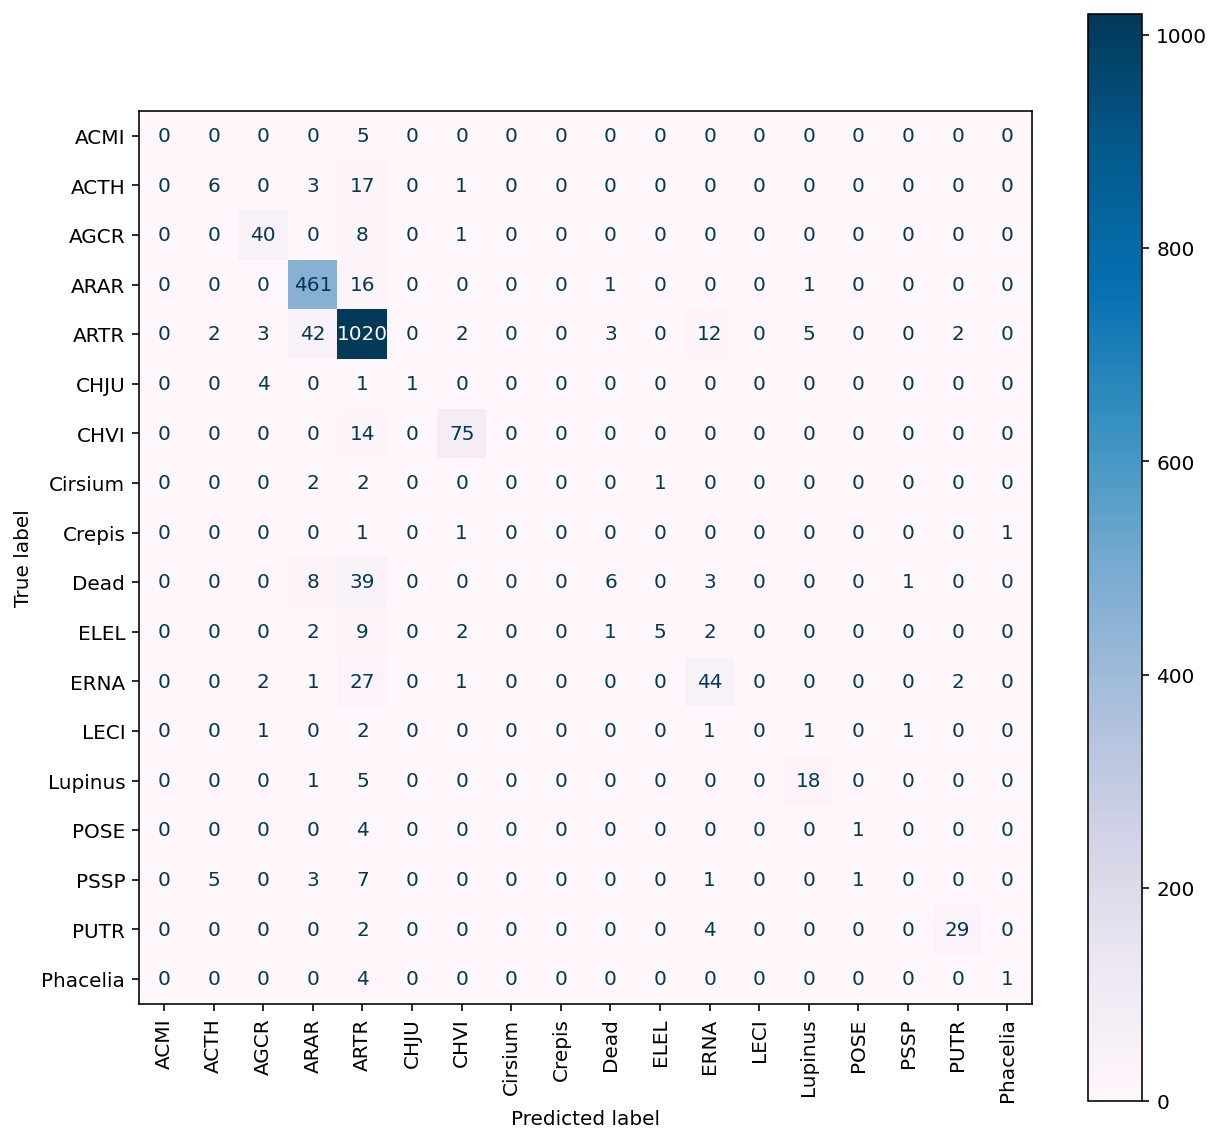

In [36]:
conf=confusion_matrix(y_true=y_test, y_pred=y_rf, labels=rf_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='PuBu')
plt.xticks(rotation=90)
plt.show()

In [37]:
y_rf = rf_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_rf))

              precision    recall  f1-score   support

        ACMI       0.00      0.00      0.00         5
        ACTH       0.46      0.22      0.30        27
        AGCR       0.80      0.82      0.81        49
        ARAR       0.88      0.96      0.92       479
        ARTR       0.86      0.93      0.90      1091
        CHJU       1.00      0.17      0.29         6
        CHVI       0.90      0.84      0.87        89
     Cirsium       0.00      0.00      0.00         5
      Crepis       0.00      0.00      0.00         3
        Dead       0.55      0.11      0.18        57
        ELEL       0.83      0.24      0.37        21
        ERNA       0.66      0.57      0.61        77
        LECI       0.00      0.00      0.00         6
     Lupinus       0.72      0.75      0.73        24
        POSE       0.50      0.20      0.29         5
        PSSP       0.00      0.00      0.00        17
        PUTR       0.88      0.83      0.85        35
    Phacelia       0.50    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


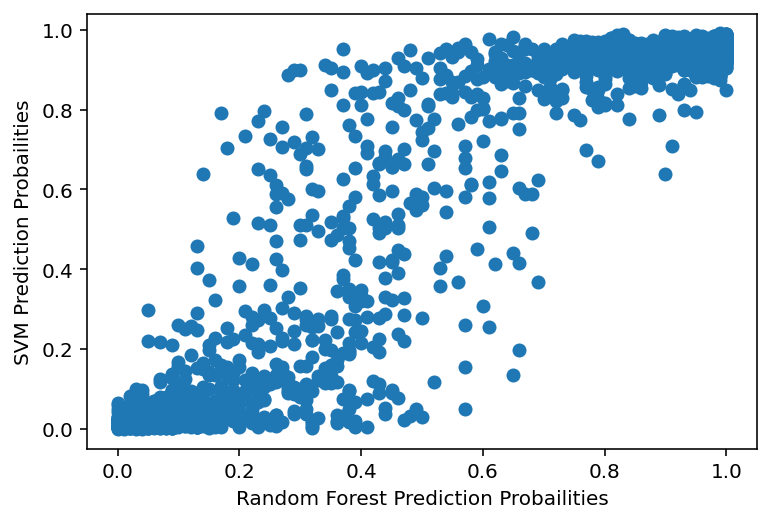

In [28]:
#largely agreement between these two methods

rf_prob=rf_model.predict_proba(X_test)
svm_prob=svc_model.predict_proba(X_test)

plt.plot(rf_prob[:, 4], svm_prob[:, 4], 'o')
plt.xlabel('Random Forest Prediction Probailities')
plt.ylabel('SVM Prediction Probailities')

plt.show()

# Ensemble Methods

In [38]:
import random

random.seed(10)

In [41]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [40]:
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
abc = AdaBoostClassifier(n_estimators=200, random_state= 1, learning_rate=0.01)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1)

In [41]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, stratify=y, 
    test_size=0.25,
    random_state=42
)

In [42]:


numeric_transformer= Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer= Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, features),
        ("cat", categorical_transformer, ['site']),
    ], 
    remainder='drop'
)

## RandomForestClassifier()

In [43]:
rfc_pipe = Pipeline([
    ('engineering', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=450, random_state=1))
])

In [44]:
rfc_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('engineering',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'perimeter',
                                                   'edge_to_area_ratio',
                                                   'chm_stdev', 'chm_mean',
                                                   'chm_max', 'chm_min',
                                                   'rgb_stdev.red',
                                                   'rgb_stdev.green',
                                                   'rgb_stdev.blue',
                                                   'rgb_mean.red',
                                                   'rgb_mean.green',
                                                   'rgb_mean.blue',
                                                   'multispec_stdev.Blue',
                                                   'multispec_stdev.Green',
                                                   'mul...
                                                   'multispec_stdev.NIR',
                                                   'multispec_mean.Blue',
                                                   'multispec_mean.Green',
                                                   'multispec_mean.Red',
                                                   'multispec_mean.RedEdge',
                                                   'multispec_mean.NIR',
                                                   'spec_stdev.ndvi',
                                                   'spec_stdev.msavi',
                                                   'spec_mean.ndvi',
                                                   'spec_mean.msavi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['site'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=450, random_state=1))])

In [45]:
y_predR = rfc_pipe.predict(X2_test)
rfc_accuracy = accuracy_score(y2_test, y_predR)
print('rfc_Accuracy:', rfc_accuracy)

rfc_Accuracy: 0.8500749625187406


## ADA

In [46]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

ada = Pipeline(steps=[
    ('engineering', preprocessor),
    ('classifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=60), n_estimators=200, learning_rate=0.01)
    )])

In [47]:
ada.fit(X2_train, y2_train)

Pipeline(steps=[('engineering',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'perimeter',
                                                   'edge_to_area_ratio',
                                                   'chm_stdev', 'chm_mean',
                                                   'chm_max', 'chm_min',
                                                   'rgb_stdev.red',
                                                   'rgb_stdev.green',
                                                   'rgb_stdev.blue',
                                                   'rgb_mean.red',
                                                   'rgb_mean.green',
                                                   'rgb_mean.blue',
                                                   'multispec_stdev.Blue',
                                                   'multispec_stdev.Green',
                                                   'mul...
                                                   'multispec_mean.Red',
                                                   'multispec_mean.RedEdge',
                                                   'multispec_mean.NIR',
                                                   'spec_stdev.ndvi',
                                                   'spec_stdev.msavi',
                                                   'spec_mean.ndvi',
                                                   'spec_mean.msavi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['site'])])),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=60),
                                    learning_rate=0.01, n_estimators=200))])

In [48]:
y_pred2 = ada.predict(X2_test)

In [49]:
ada_accuracy = accuracy_score(y2_test, y_pred2)

In [50]:
print('ada_Accuracy:', ada_accuracy)

ada_Accuracy: 0.7896051974012993


## GBC

In [51]:
# Create an XGBoostClassifier pipeline
gbc_pipe = Pipeline([
    ('engineering', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01))
])


In [52]:
gbc_pipe.fit(X2_train, y2_train)

Pipeline(steps=[('engineering',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'perimeter',
                                                   'edge_to_area_ratio',
                                                   'chm_stdev', 'chm_mean',
                                                   'chm_max', 'chm_min',
                                                   'rgb_stdev.red',
                                                   'rgb_stdev.green',
                                                   'rgb_stdev.blue',
                                                   'rgb_mean.red',
                                                   'rgb_mean.green',
                                                   'rgb_mean.blue',
                                                   'multispec_stdev.Blue',
                                                   'multispec_stdev.Green',
                                                   'mul...
                                                   'multispec_mean.Blue',
                                                   'multispec_mean.Green',
                                                   'multispec_mean.Red',
                                                   'multispec_mean.RedEdge',
                                                   'multispec_mean.NIR',
                                                   'spec_stdev.ndvi',
                                                   'spec_stdev.msavi',
                                                   'spec_mean.ndvi',
                                                   'spec_mean.msavi']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['site'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=200,
                                            random_state=1))])

In [57]:
y_pred3 = gbc_pipe.predict(X2_test)
xgb_accuracy = accuracy_score(y2_test, y_pred3)
print('gbc_Accuracy:', xgb_accuracy)

gbc_Accuracy: 0.8390804597701149


## XGB

In [53]:
numeric_transformer= Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer= Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor1= ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, features),
        ("cat", categorical_transformer, ['site']),
    ], 
    remainder='drop'
)

In [54]:

# Create an XGBoostClassifier pipeline
xgb_pipe = Pipeline([
    ('engineering', preprocessor1),
    ('classifier', xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1))
])




In [55]:
y_xgb=y.copy()

In [56]:
y_xgb.head()

0    ARTR
1    ARTR
2    ARTR
3    ARTR
4    ARTR
Name: best, dtype: object

In [64]:

le = LabelEncoder()
y_xgb = le.fit_transform(y_xgb)


In [65]:
Xg_train, Xg_test, yg_train, yg_test = train_test_split(
    X, y_xgb, stratify=y, 
    test_size=0.25,
    random_state=42
)

In [66]:
xgb_pipe = Pipeline([
    ('engineering', preprocessor1),
    ('classifier', xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1))
])

In [67]:
xgb_pipe.fit(Xg_train, yg_train)

Pipeline(steps=[('engineering',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'perimeter',
                                                   'edge_to_area_ratio',
                                                   'chm_stdev', 'chm_mean',
                                                   'chm_max', 'chm_min',
                                                   'rgb_stdev.red',
                                                   'rgb_stdev.green',
                                                   'rgb_stdev.blue',
                                                   'rgb_mean.red',
                                                   'rgb_mean.green',
                                                   'rgb_mean.blue',
                                                   'multispec_stdev.Blue',
                                                   'multispec_stdev.Green',
                                                   'mul...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.01, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=200, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=1, reg_alpha=0, ...))])

In [68]:
y_pred4 = xgb_pipe.predict(Xg_test)
xgb_accuracy = accuracy_score(yg_test, y_pred4)
print('xgb_Accuracy:', xgb_accuracy)

xgb_Accuracy: 0.847576211894053


In [70]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
en_data = [['RandomForestClassifier', 0.85007], ['AdaBoostClassifier', 0.7896], ['GradientBoostingClassifier', 0.83908],['XGBClassifier', 0.84757]]
  
# Create the pandas DataFrame
en_df = pd.DataFrame(en_data, columns=['classifier', 'Accuracy'])
  
# print dataframe.
en_df

,classifier,Accuracy
0,RandomForestClassifier,0.85007
1,AdaBoostClassifier,0.78960
2,GradientBoostingClassifier,0.83908
3,XGBClassifier,0.84757


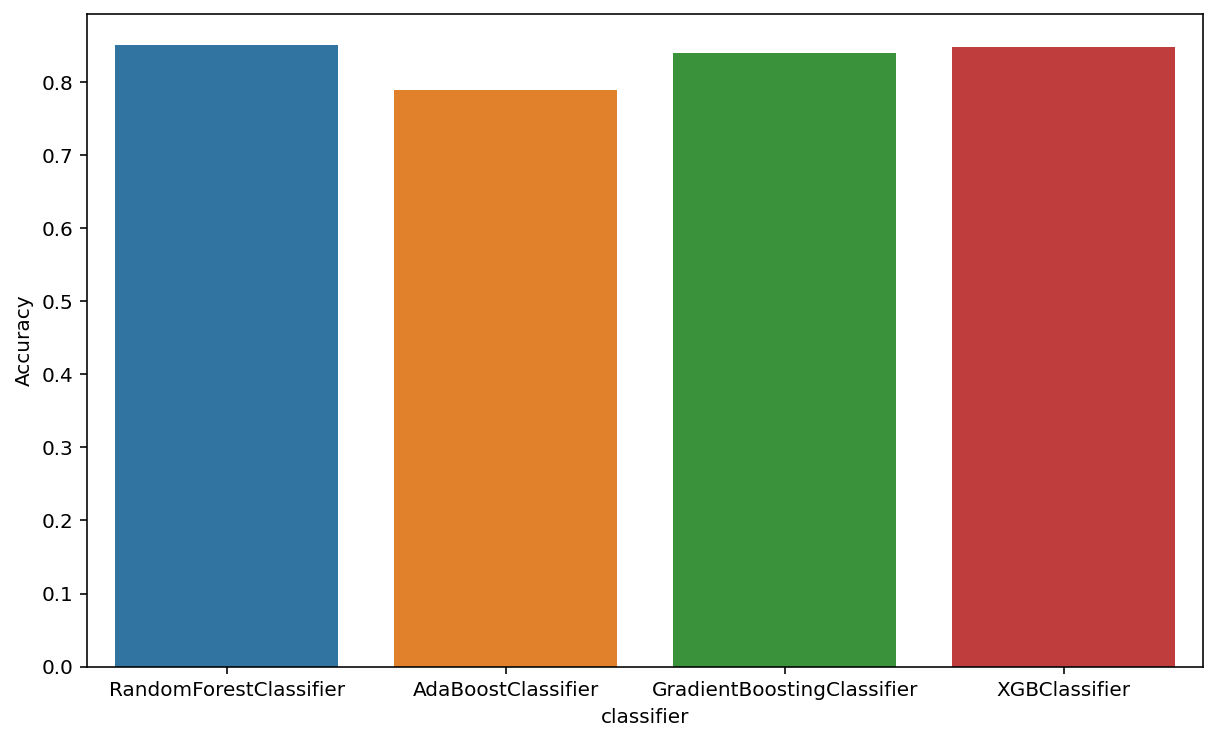

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x = 'classifier',y = 'Accuracy',data =en_df)

plt.show()

# Site specific Test-Train split 

In [72]:
goodone.head()

,ID,Species,Class,site,area,perimeter,edge_to_area_ratio,chm_stdev,chm_mean,chm_max,...,multispec_mean.RedEdge,multispec_mean.NIR,spec_stdev.ndvi,spec_stdev.msavi,spec_mean.ndvi,spec_mean.msavi,Row Labels,Count of Species,best,worst
0,7121.0,ARTRW,Shrub,Cold,0.499442,3.415730,6.839089,0.206985,0.663140,0.974365,...,4622.564453,5762.875000,0.102730,0.096712,0.472799,1.135303,ARTRW,227.0,ARTR,ARTR
1,7164.0,ARTRW,Shrub,Cold,0.242941,2.445352,10.065606,0.100582,0.448865,0.597778,...,4252.373535,5000.758789,0.091980,0.102148,0.344197,1.005134,ARTRW,227.0,ARTR,ARTR
2,7321.0,ARTRW,Shrub,Cold,0.322039,2.522983,7.834410,0.091778,0.394244,0.527344,...,4651.359375,5615.370605,0.118684,0.118178,0.414473,1.076138,ARTRW,227.0,ARTR,ARTR
3,7386.0,ARTRW,Shrub,Cold,0.604152,3.765066,6.231986,0.140735,0.560690,0.791992,...,2488.788574,3070.211182,0.136748,0.141029,0.411342,1.069305,ARTRW,227.0,ARTR,ARTR
4,7407.0,ARTRW,Shrub,Cold,0.416579,2.988764,7.174550,0.138178,0.510144,0.683716,...,4523.458496,5996.613770,0.096638,0.086110,0.531004,1.188229,ARTRW,227.0,ARTR,ARTR


In [115]:
goodone["site"].value_counts()

Cold                1736
SouthTrail          1640
InitialPointBurn     921
PonyComplex2         870
SodaNaturalArea2     666
LowerDryCreek        614
NorthHam             569
SodaNaturalArea1     403
CorralsTrail         344
PonyComplex1         241
Name: site, dtype: int64

In [77]:
goodone["site"].unique()

array(['Cold', 'PonyComplex2', 'InitialPointBurn', 'LowerDryCreek',
       'NorthHam', 'PonyComplex1', 'SodaNaturalArea1', 'SouthTrail',
       'CorralsTrail', 'SodaNaturalArea2'], dtype=object)

## creating a fuction to select one specific site for test set and keep another nine set for train set

In [254]:

goodone1=goodone.copy()

In [262]:
features=[
    "site", "area", "perimeter", "edge_to_area_ratio", 
    "chm_stdev", "chm_mean", "chm_max", "chm_min", "rgb_stdev.red", 
    "rgb_stdev.green", "rgb_stdev.blue", "rgb_mean.red", "rgb_mean.green", 
    "rgb_mean.blue", "multispec_stdev.Blue", "multispec_stdev.Green", 
    "multispec_stdev.Red", "multispec_stdev.RedEdge", "multispec_stdev.NIR", 
    "multispec_mean.Blue", "multispec_mean.Green", "multispec_mean.Red", 
    "multispec_mean.RedEdge", "multispec_mean.NIR", "spec_stdev.ndvi", 
    "spec_stdev.msavi", "spec_mean.ndvi", "spec_mean.msavi"
]

features.remove('site')

numeric_transformer= Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer= Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, features),
        ("cat", categorical_transformer, ['site']),
    ], 
    remainder='drop'
)

In [252]:
def leave_one_out(df):
    
    
    first_res={
        'Test_site':[],
        'Model':[],
        'Accuracy': []
        
    }
    
    
    for j in df['site'].unique():
        left_out=df[df['site'] == j]
        others=df[df['site'] != j]
        
        
#         train_set = goodone1[goodone1.site != 'j']
#         test_set= goodone1.loc[goodone1['site'] == 'j']
        
        
        X_train, y_train=others.drop('Species', axis=1), others.Species
            
        X_test, y_test=left_out.drop('Species', axis=1), left_out.Species
        
        rf_model= Pipeline(steps=[
            ('engineering', preprocessor),
            ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
        ])
        
        svc_model = Pipeline(steps=[
            ('engineering', preprocessor),
            ('classifier', SVC(probability=True))
        ])
        
        gbc_pipe= Pipeline([
            ('engineering', preprocessor),
            ('classifier', GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01))
        ])
        
        

        svc_model.fit(X_train, y_train)
        gbc_pipe.fit(X_train, y_train)
        rf_model.fit(X_train, y_train)


        
        ## predict
        pred_testrf = rf_model.predict(X_test)
        pred_testsvc = svc_model.predict(X_test)
        pred_testgb = gbc_pipe.predict(X_test)
        
        ## acc
        y_predrf=accuracy_score(pred_testrf, y_test)
        y_prefgb=accuracy_score(pred_testgb, y_test)
        y_predsvc=accuracy_score(pred_testsvc, y_test)
        
        
        first_res['Test_site'].extend([j]*3)
        first_res['Model'].extend(['RFClassifier', 'SVC', 'GBClassifier'])
        first_res['Accuracy'].extend([ y_predrf, y_predsvc,  y_prefgb])
        
    return pd.DataFrame(first_res)

In [247]:
goodone2=goodone1.site.unique()

In [250]:
goodone3=goodone1[goodone1.site.isin(goodone2)]

In [268]:
leave_one_out(goodone1)

,Test_site,Model,Accuracy
0,Cold,RFClassifier,0.008065
1,Cold,SVC,0.041475
2,Cold,GBClassifier,0.006336
3,PonyComplex2,RFClassifier,0.178161
4,PonyComplex2,SVC,0.195402
5,PonyComplex2,GBClassifier,0.183908
6,InitialPointBurn,RFClassifier,0.790445
7,InitialPointBurn,SVC,0.827362
8,InitialPointBurn,GBClassifier,0.937025
9,LowerDryCreek,RFClassifier,0.545603


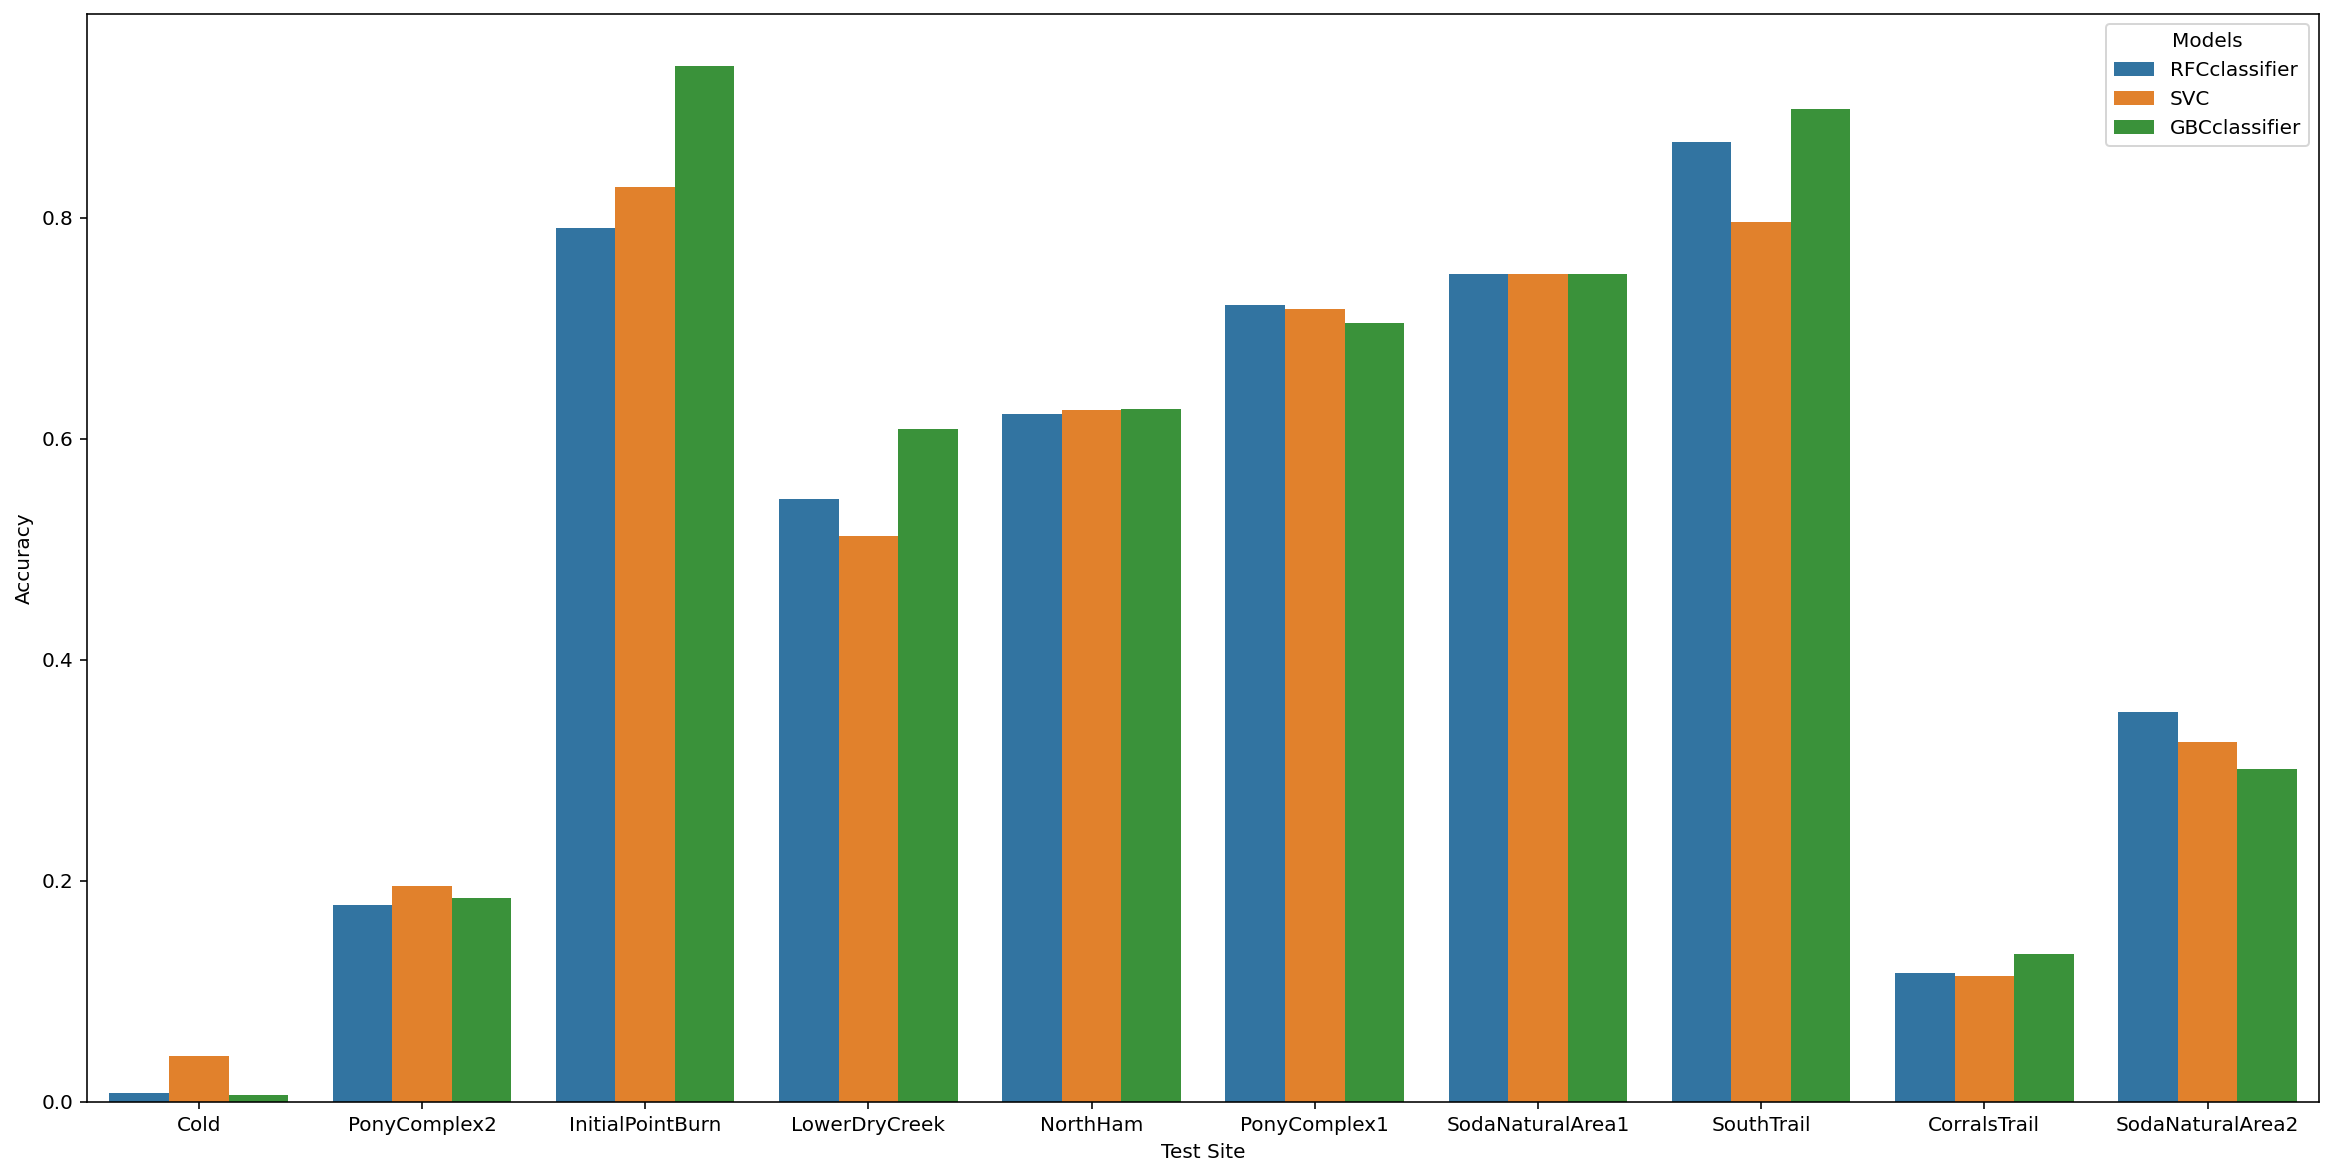

In [283]:

#Visualization of result


sitenames=goodone1["site"].unique()
site_col=np.repeat(sitenames, 3)

model_names=['RFCclassifier','SVC','GBCclassifier']*10

Accuray_values =[.008,.041,.006,
                0.178,0.1954,0.1839,0.7904,0.8273,0.937,0.545,0.5114,0.609,0.622,0.6256,0.627,0.721,0.717,0.705,0.7493,0.749,0.7493,0.868,0.796,0.898,0.116,0.1133,0.1337,.3528,0.3258, 0.301 
                 
                ]

Accuray_values = np.array(Accuray_values)

perf=pd.DataFrame({
    'Test Site':site_col,
    'Models': model_names,
    'Accuracy': Accuray_values
})

plt.figure(figsize=(20,10))
sns.barplot(x='Test Site', y='Accuracy', hue='Models', data=perf)
plt.show()


The findings are intriguing. It is evident that accuracy is inadequate for some of the sites, including cold, ponycomplex2, corralstrail, and sodanaturalarea. This experiment encourages us to investigate this accuracy loss more thoroughly. The model or the data—which is it?